# Comparaison taille des classes SEGPA en REP/REP+/zone "normale"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lv-college.csv', sep = ';')
segpa_rep = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP', aggfunc = 'sum')
segpa_replus = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP +', aggfunc = 'sum')

Text(0.5, 1.0, "Nombre d'élèves en SEGPA en fonction du label du collège")

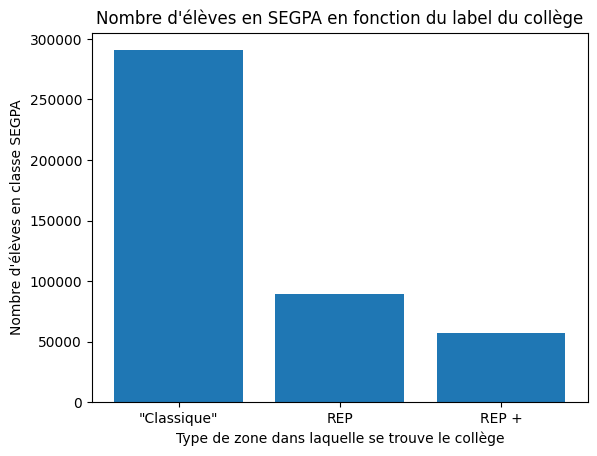

In [3]:
rep = segpa_rep.loc[1, "Nombre d'élèves total Segpa"]
replus = segpa_replus.loc[1, "Nombre d'élèves total Segpa"]
clas = segpa_rep.loc[0, "Nombre d'élèves total Segpa"] + segpa_rep.loc[1, "Nombre d'élèves total Segpa"] - (rep+replus)

values = [clas, rep, replus]
categories = ['"Classique"', 'REP', 'REP +']

plt.bar(categories, values)
plt.xlabel('Type de zone dans laquelle se trouve le collège')
plt.ylabel("Nombre d'élèves en classe SEGPA")
plt.title("Nombre d'élèves en SEGPA en fonction du label du collège")

Cela semble assez peu convaincant : je voulais voir qu'il y a plus d'élèves en SEGPA dans les zones prioritaires mais avec cette perspective là, ce n'est pas le cas. Je vais donc regarder en proportion car il y a plus d'élèves dans les zones "classiques" que REP / REP +.

Text(0.5, 1.0, "Proportion d'élèves en SEGPA en fonction du label du collège")

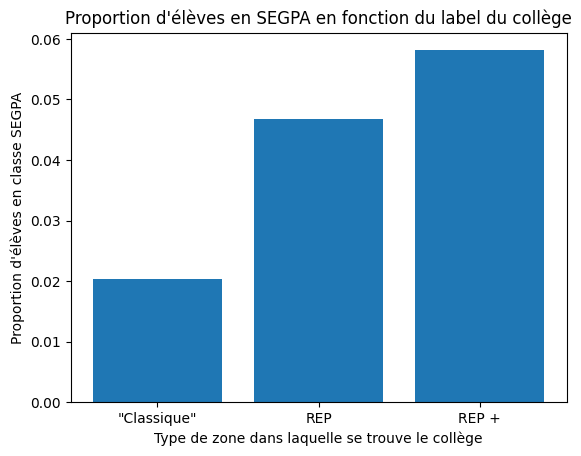

In [4]:
total_rep = df.pivot_table(values = "Nombre d'élèves total", index = 'REP', aggfunc = 'sum')
total_replus = df.pivot_table(values = "Nombre d'élèves total", index = 'REP +', aggfunc = 'sum')

elvrep = total_rep.loc[1, "Nombre d'élèves total"]
elvreplus = total_replus.loc[1, "Nombre d'élèves total"]
elvclas = total_rep.loc[0, "Nombre d'élèves total"] + total_rep.loc[1, "Nombre d'élèves total"] - (elvrep+elvreplus)

proportion = [clas/elvclas, rep/elvrep, replus/elvreplus]

plt.bar(categories, proportion)
plt.xlabel('Type de zone dans laquelle se trouve le collège')
plt.ylabel("Proportion d'élèves en classe SEGPA")
plt.title("Proportion d'élèves en SEGPA en fonction du label du collège")

On voit ici que dans les collèges en REP +, il y a plus d'élèves en proportion en SEGPA que dans les collèges en REP et encore plus que dans les "classiques". C'est assez logique puisque ces classes sont créées afin "d'accueillir les jeunes de la 6e à la 3e présentant des difficultés scolaires importantes", ce qui est plus courant dans les réseaux d'éducation prioritaires en raison de la situation défavorisée des enfants qui dépendent de ces collèges.

# Comparaison taille des classes ULIS en REP/REP+/zone "normale"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('lv-college.csv', sep = ';')
ulis_rep = df.pivot_table(values = "Nombre d'élèves total ULIS", index = 'REP', aggfunc = 'sum')
ulis_replus = df.pivot_table(values = "Nombre d'élèves total ULIS", index = 'REP +', aggfunc = 'sum')

Text(0.5, 1.0, "Nombre d'élèves en ULIS en fonction du label du collège")

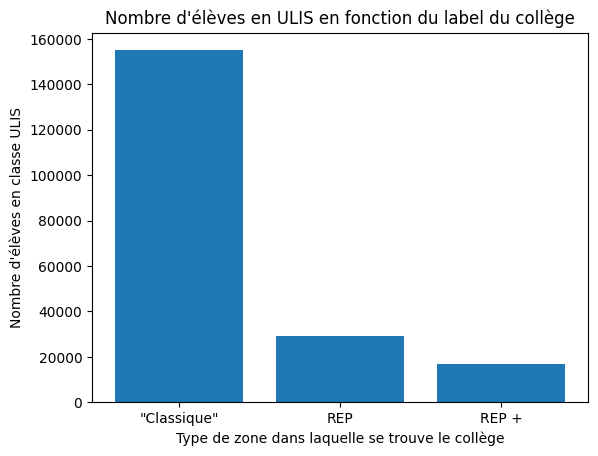

In [7]:
rep = ulis_rep.loc[1, "Nombre d'élèves total ULIS"]
replus = ulis_replus.loc[1, "Nombre d'élèves total ULIS"]
clas = ulis_rep.loc[0, "Nombre d'élèves total ULIS"] + ulis_rep.loc[1, "Nombre d'élèves total ULIS"] - (rep+replus)

values = [clas, rep, replus]
categories = ['"Classique"', 'REP', 'REP +']

plt.bar(categories, values)
plt.xlabel('Type de zone dans laquelle se trouve le collège')
plt.ylabel("Nombre d'élèves en classe ULIS")
plt.title("Nombre d'élèves en ULIS en fonction du label du collège")

Comme pour l'étude faite sur les classes SEGPA, ce que l'on obtient est assez peu convaincant : je voulais voir qu'il y a plus d'élèves en ULIS dans les zones prioritaires ce n'est pas le résultat qui ressort. Je vais donc regarder en proportion car il y a plus d'élèves dans les zones "classiques" que REP / REP +.

Text(0.5, 1.0, "Proportion d'élèves en ULIS en fonction du label du collège")

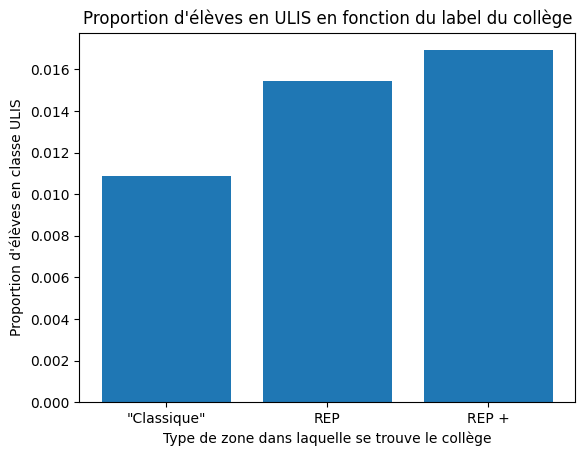

In [8]:
total_rep = df.pivot_table(values = "Nombre d'élèves total", index = 'REP', aggfunc = 'sum')
total_replus = df.pivot_table(values = "Nombre d'élèves total", index = 'REP +', aggfunc = 'sum')

elvrep = total_rep.loc[1, "Nombre d'élèves total"]
elvreplus = total_replus.loc[1, "Nombre d'élèves total"]
elvclas = total_rep.loc[0, "Nombre d'élèves total"] + total_rep.loc[1, "Nombre d'élèves total"] - (elvrep+elvreplus)

proportion = [clas/elvclas, rep/elvrep, replus/elvreplus]

plt.bar(categories, proportion)
plt.xlabel('Type de zone dans laquelle se trouve le collège')
plt.ylabel("Proportion d'élèves en classe ULIS")
plt.title("Proportion d'élèves en ULIS en fonction du label du collège")

Là on voit bien que dans les collèges en REP +, il y a plus d'élèves en proportion en ULIS que dans les collèges en REP et encore plus que dans les "classiques".

Text(0.5, 1.0, 'Répartition des collèges privés en REP/REP +/classique')

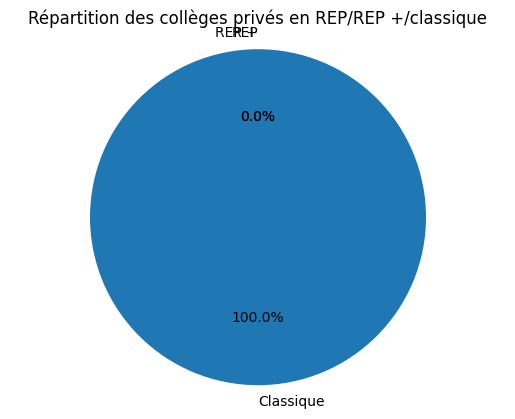

In [9]:
df = pd.read_csv('lv-college.csv', sep = ';')

secteur = df.groupby(by = ['Secteur'])

prive = secteur.get_group(('PRIVE',))
nb_prive = prive.shape[0]
priv_replus = prive['REP +'].sum()/nb_prive*100
priv_rep = prive['REP'].sum()/nb_prive*100
priv_clas = 100 - priv_replus - priv_rep

labels = ['Classique', 'REP', 'REP +']
values = [priv_clas, priv_rep, priv_replus]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Répartition des collèges privés en REP/REP +/classique')

Text(0.5, 1.0, 'Répartition des collèges publics en REP/REP +/classique')

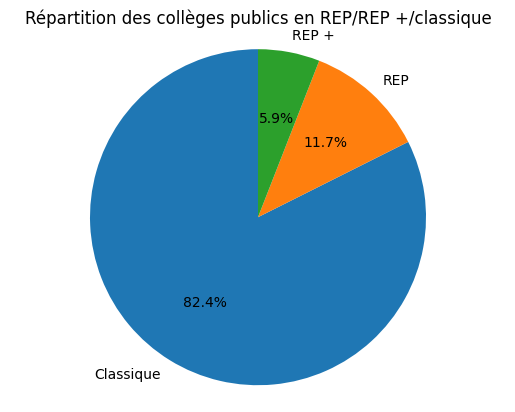

In [10]:
pub = secteur.get_group(('PUBLIC',))
nb_pub = pub.shape[0]
pub_replus = pub['REP +'].sum()/nb_pub*100
pub_rep = pub['REP'].sum()/nb_pub*100
pub_clas = 100 - pub_rep - pub_replus

labels = ['Classique', 'REP', 'REP +']
values = [pub_clas, pub_rep, pub_replus]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Répartition des collèges publics en REP/REP +/classique')

On remarque qu'aucun collège privé n'est classifié en REP ou REP +. En effet, les REP (réseaux d'éducation prioritaire) ont été mis en place afin de de telle sorte qu'ils soient un des "principaux leviers pour réduire les inégalités sociales", or les parents qui placent leurs enfants dans le privé sont souvent issus de milieux socio-économiques favorisés. Les enfants de ces collèges n'ont donc pas besoin de bénéficier d'un tel accompagnement (dédoublement de classes par exemple).

Dans le secteur public, la part de collèges en REP ou REP + est plus importante même si elle reste relativement faible : cumulés, les collèges en REP et REP + représentent seulement 18% environ de la part des collèges